# Sentiment Analysis Magical Mexican Towns Training Corpus - DataViz

The dataset consists of 208,051 rows (70% of the original dataset. The remaining 30% will be used as a test set), one for each opinion. Each row contains 6 columns:

1. **Title**: The title that the tourist assigned to their opinion. Data type: Text.
2. **Review**: The opinion issued by the tourist. Data type: Text.
3. **Polarity**: The label representing the sentiment polarity of the opinion. Data type: [1, 2, 3, 4, 5].
4. **Town**: The town where the review is focused. Data type: Text.
5. **Region**: The region (state in Mexico) where the town is located. Data type: Text. This feature is not intended to be classified but is provided as additional information that could be leveraged in classification models.
6. **Type**: The type of place the review refers to. Data type: [Hotel, Restaurant, Attractive].


In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import sys
sys.path.append('./')
from config import setConfig
device = setConfig()

Usando MPS: mps
Tensor de prueba creado en el dispositivo: tensor([1.], device='mps:0') mps


In [17]:
df = pd.read_csv(r'/Users/roicort/GitHub/REST-MEX25/data/train/train.csv')

In [3]:
df.head()

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel


In [4]:
df.describe()

,Polarity
count,208051.000000
mean,4.450500
std,0.932237
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Title

The title that the tourist assigned to their opinion. Data type: Text.

In [5]:
# Describe the titles

titles = df['Title']
titles.value_counts()

Title
Excelente                                                                 1747
Excelente servicio                                                         764
Excelente lugar                                                            723
Delicioso                                                                  649
Hermoso                                                                    518
                                                                          ... 
Una estancia de una noche en el hotel Xibalba, alias construcción zona       1
Ocean suite ático piscina paraíso                                            1
Fantástico entorno, evitar la excursión Booth timo!                          1
Increíble lugar y comida                                                     1
Un Tepoz debe                                                                1
Name: count, Length: 142966, dtype: int64

In [6]:
# Plot the most frequent ones

#titles.value_counts().nlargest(32).plot(kind='bar')

fig = px.bar(titles.value_counts().nlargest(32), x=titles.value_counts().nlargest(32).index, y=titles.value_counts().nlargest(32).values)
fig.show()

## Review

The opinion issued by the tourist. Data type: Text.

In [7]:
# Describe the reviews

reviews = df['Review']
reviews.value_counts()

Review
Agua clara, tranquila, relajante, piscina Cenote Hermoso sitio de buceo. Gran escape de las multitudes mammoth en lugares más orientado al turismo.                                                                                                                                                                                                                                                                                    3
Un lugar lleno de energía. Toda la estructura es bastante impresionante para la época en que fue construido. Usted debe subir a la pirámide y sentir la energía de la tierra. Y por supuesto una gran vista de todo el campus.                                                                                                                                                                                                         3
Deben visitarlo, el precio de la excursión no es caro y vale totalmente la pena! No se lo pierdan!!!                                           

In [ ]:
# Plot the most frequent words in the reviews

# Load model
nlp = spacy.load("es_core_news_sm")

# Process reviews with spaCy
reviews_doc = reviews.apply(lambda x: nlp(x))

# Extract tokens, remove punctuation, stopwords, and convert to lower case
tokens = [token.text.lower() for doc in reviews_doc for token in doc 
          if token.is_alpha and not token.is_stop]

word_freq = Counter(tokens)
most_common_words = word_freq.most_common(20)

words, counts = zip(*most_common_words)


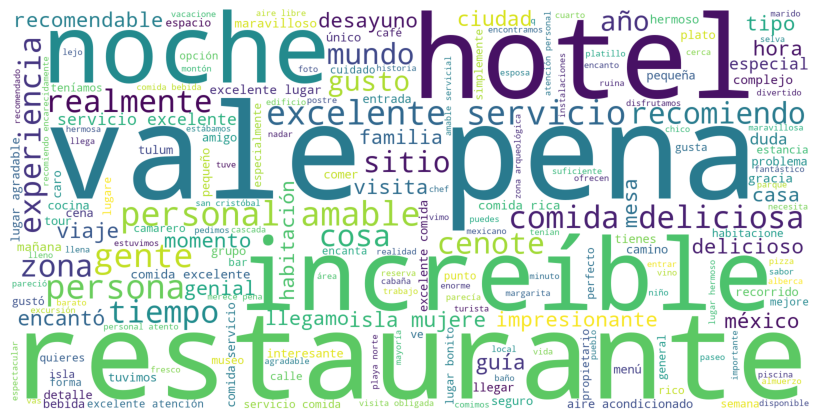

In [18]:
# Word cloud

wordcloud = WordCloud(width = 1600, height = 800,
                background_color ='white',
                stopwords = nlp.Defaults.stop_words,
                min_font_size = 10).generate(' '.join(tokens)) 

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [10]:
# Plot the most frequent words in the reviews

fig = px.bar(x=words, y=counts)
fig.show()

## Polarity

The label representing the sentiment polarity of the opinion. Data type: [1, 2, 3, 4, 5].

In [19]:
# Describe the polarities

polarities = df['Polarity']
polarities.describe()

count    208051.000000
mean          4.450500
std           0.932237
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Polarity, dtype: float64

In [ ]:
# Plot the polarities

fig = px.histogram(polarities, nbins=5)
fig.show()

In [25]:
# Porcentaje de polaridades positivas, negativas y neutras

#polarities.value_counts(normalize=True).plot(kind='pie')

fig = px.pie(polarities.value_counts(normalize=True), values=polarities.value_counts(normalize=True).values, names=polarities.value_counts(normalize=True).index)
fig.show()

## Town

The town where the review is focused. Data type: Text.

In [26]:
# Describe the towns

towns = df['Town']
towns.describe()

count     208051
unique        40
top        Tulum
freq       45345
Name: Town, dtype: object

In [38]:
fig = px.histogram(towns.value_counts(), x=towns.value_counts().index, y=towns.value_counts().values)
fig.show()

## Region

The region (state in Mexico) where the town is located. Data type: Text. This feature is not intended to be classified but is provided as additional information that could be leveraged in classification models.

In [137]:
regions = df['Region']
regions.describe()

count          208051
unique             19
top       QuintanaRoo
freq            85993
Name: Region, dtype: object

In [138]:
regions.value_counts()

Region
QuintanaRoo           85993
Chiapas               23532
Estado_de_Mexico      19439
Yucatan               13678
Jalisco               11168
Baja_CaliforniaSur    10125
Nayarit                7337
Puebla                 6832
Queretaro              4879
Michoacan              4454
Guerrero               4201
Morelos                3445
Veracruz               3339
San_Luis_Potosi        2218
Chihuahua              1786
Coahuila               1741
Hidalgo                1509
Oaxaca                 1466
Guanajuato              909
Name: count, dtype: int64

In [139]:
dataset_regions_names = {'QuintanaRoo': 'Quintana Roo',
                'Michoacan': 'Michoacán de Ocampo',
                'Estado_de_Mexico': 'México',
                'Queretaro': 'Querétaro',
                'Baja_CaliforniaSur': 'Baja California Sur',
                'San_Luis_Potosi': 'San Luis Potosí',
                }

regions_ = regions.replace(dataset_regions_names)

print('Dataset Names: ', regions.unique())
print('Custom Names: ', regions_.unique())

Dataset Names:  ['Nayarit' 'QuintanaRoo' 'Michoacan' 'Chiapas' 'Estado_de_Mexico'
 'Chihuahua' 'Guerrero' 'Yucatan' 'Puebla' 'Queretaro' 'Jalisco'
 'Baja_CaliforniaSur' 'Coahuila' 'Veracruz' 'Hidalgo' 'Morelos'
 'San_Luis_Potosi' 'Oaxaca' 'Guanajuato']
Custom Names:  ['Nayarit' 'Quintana Roo' 'Michoacán de Ocampo' 'Chiapas' 'México'
 'Chihuahua' 'Guerrero' 'Yucatan' 'Puebla' 'Querétaro' 'Jalisco'
 'Baja California Sur' 'Coahuila' 'Veracruz' 'Hidalgo' 'Morelos'
 'San Luis Potosí' 'Oaxaca' 'Guanajuato']


In [140]:
fig = px.histogram(regions_.value_counts(), x=regions_.value_counts().index, y=regions_.value_counts().values)
fig.show()

In [ ]:
import geopandas as gpd

gdf = gpd.read_file(r'https://raw.githubusercontent.com/dezkareid/echarts-choropleth-map/refs/heads/master/estados.json')

# Convert to WGS84 
gdf = gdf.to_crs(epsg=4326)

gdf.head()

,state_code,name,geometry
0,9,Distrito Federal,"POLYGON ((-99.09052 19.50926, -99.06421 19.498..."
1,12,Guerrero,"POLYGON ((-100.53878 18.84399, -100.50201 18.8..."
2,15,México,"POLYGON ((-99.85919 20.26838, -99.8595 20.2649..."
3,17,Morelos,"POLYGON ((-99.06199 19.04877, -99.02935 19.085..."
4,25,Sinaloa,"POLYGON ((-108.47046 27.03457, -108.42165 27.0..."


In [ ]:
# Add gdf geometry to the regions counts

regions_counts = regions_.value_counts().reset_index()
regions_counts.columns = ['name', 'count']
regions_counts.head()

# Merge 
merged = gdf.merge(regions_counts, on='name', how='left') # Merge on 'name' column

# Fill NaN values
merged['count'] = merged['count'].fillna(0)  # Rellenar NaN con 0 (puedes usar otro valor si prefieres)

In [ ]:
# Crear el gráfico con mejoras
fig = px.choropleth(
    merged,
    geojson=gdf.__geo_interface__,  # GeoJSON 
    locations='name',  # Column in regions_counts that matches the GeoJSON 'names'
    featureidkey="properties.name",  # Property in GeoJSON with region names
    color='count', # Column to use for coloring
    projection="mercator",  # Projection
    title="Distribución de regiones por conteo",  
    color_continuous_scale="Inferno",  # Colors
    labels={'count': 'Conteo'}  # Labels
)

# Adjust map
fig.update_geos(
    fitbounds="locations",  # Adjust map to the boundaries of the regions
    visible=False  # Hide the map outline
)

# Adjust layout
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},  # Margins
    coloraxis_colorbar={
        'title': "Conteo", 
        'tickvals': [regions_counts['count'].min(), regions_counts['count'].max()],  # Values for the color bar
        'ticktext': ['Mínimo', 'Máximo']  # Custom text
    }
)

fig.show()

## Type

The type of place the review refers to. Data type: [Hotel, Restaurant, Attractive].

In [178]:
# Describe the types

types = df['Type']
types.describe()

count         208051
unique             3
top       Restaurant
freq           86720
Name: Type, dtype: object

In [179]:
# Plot the types

fig = px.histogram(types.value_counts(), x=types.value_counts().index, y=types.value_counts().values)
fig.show()

In [180]:
# Percentage of types

fig = px.pie(types.value_counts(normalize=True), values=types.value_counts(normalize=True).values, names=types.value_counts(normalize=True).index)
fig.show()